#**GROUP-N - Image Search Engine**

In [ ]:
#libraries imported
from PIL import Image
#keras model libararies
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.utils import shuffle
import numpy as np
import inspect
import os
import numpy as np
#importing the developed codes into the main code
from utils import *
from image_search_engine import *
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
#displaying the dataframes as tables using pandas
from IPython.display import display
from IPython.display import HTML
#plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
Dataset_path = "/Users/ganeshkumaranmasilamani/Desktop/imagesearch"
Glove_load_path = "/Users/ganeshkumaranmasilamani/Desktop/glove"
Image_features_path = "/Users/ganeshkumaranmasilamani/Desktop/Image_features"
Image_mapping_path = "/Users/ganeshkumaranmasilamani/Desktop/Image_mapping"
Custom_Images_features_path = "/Users/ganeshkumaranmasilamani/Desktop/custom_features"
Custom_Image_features_mapping_path = "/Users/ganeshkumaranmasilamani/Desktop/custom_mapping"

In [ ]:
model = image_search_engine.load_headless_pretrained_model()

Loading the pretrained VGG model...


In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
images, vectors, image_paths, word_vectors = load_images_vectors_paths(Glove_load_path, Dataset_path)

Found 400000 word vectors.


In [ ]:
generate_image_features = True
if generate_image_features:
    images_features, file_index = image_search_engine.generate_features(image_paths, model)
    image_search_engine.save_features(Image_features_path, images_features, Image_mapping_path, file_index)
else:
    images_features, file_index = image_search_engine.load_features(Image_features_path, Image_mapping_path)

Generating the image features...
Saving the image features...


In [ ]:
image_index = image_search_engine.index_features(images_features)

Indexing the features of the dataset...


In [ ]:
index_results = image_search_engine.search_index_by_key(150, image_index, file_index)
display(index_results)

[[150,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/person/2008_001501.jpg',
  0.0003103035851381719],
 [171,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/person/2008_007277.jpg',
  0.9328030347824097],
 [264,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/boat/2008_003951.jpg',
  0.9384720325469971],
 [168,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/person/2008_002283.jpg',
  0.9540884494781494],
 [257,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/boat/2008_000195.jpg',
  0.96097332239151],
 [278,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/boat/2008_004014.jpg',
  0.9732795357704163],
 [967,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/cow/2008_007729.jpg',
  1.013686180114746],
 [744,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/bicycle/2008_001523.jpg',
  1.0207363367080688],
 [459,
  '/Users/ganeshkumaranmasilamani/Desktop/imagesearch/motorbike/2008_007348.jpg',
  1.0216132402420044],
 [265,
  '/Users/ganeshk

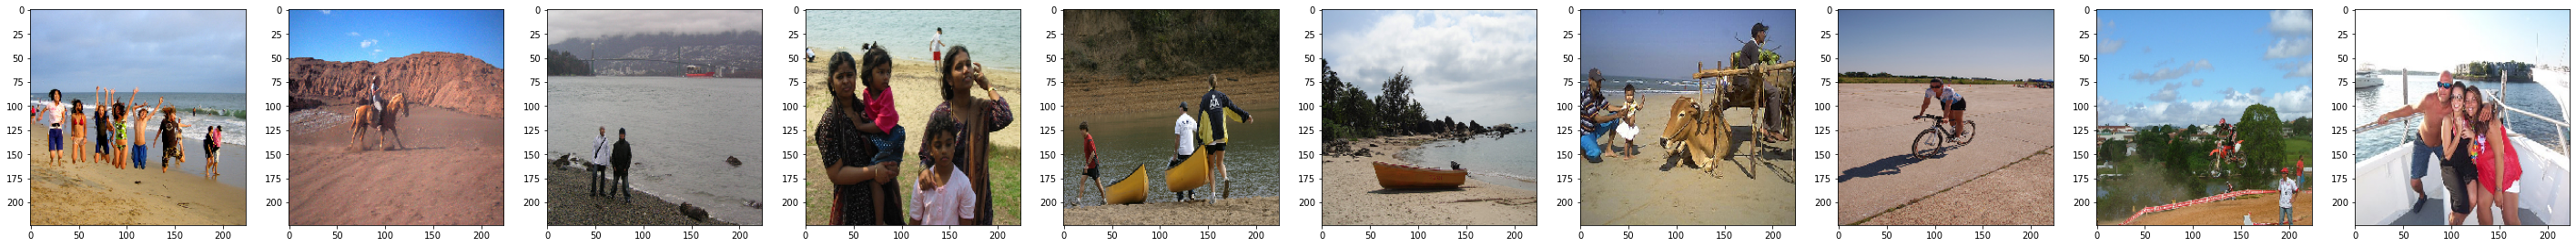

In [ ]:
displayImages(index_results)

## Image Search by Feature Vectors

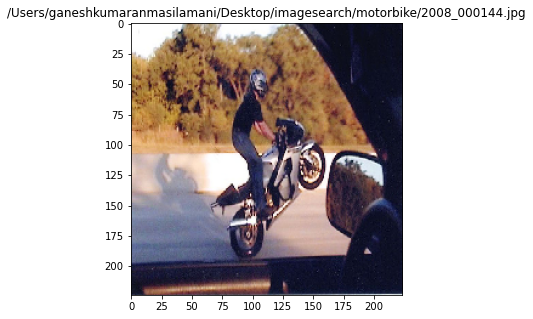

In [ ]:
query_image_path = "/Users/ganeshkumaranmasilamani/Desktop/imagesearch/motorbike/2008_000144.jpg"
displayImagebyPath(query_image_path)

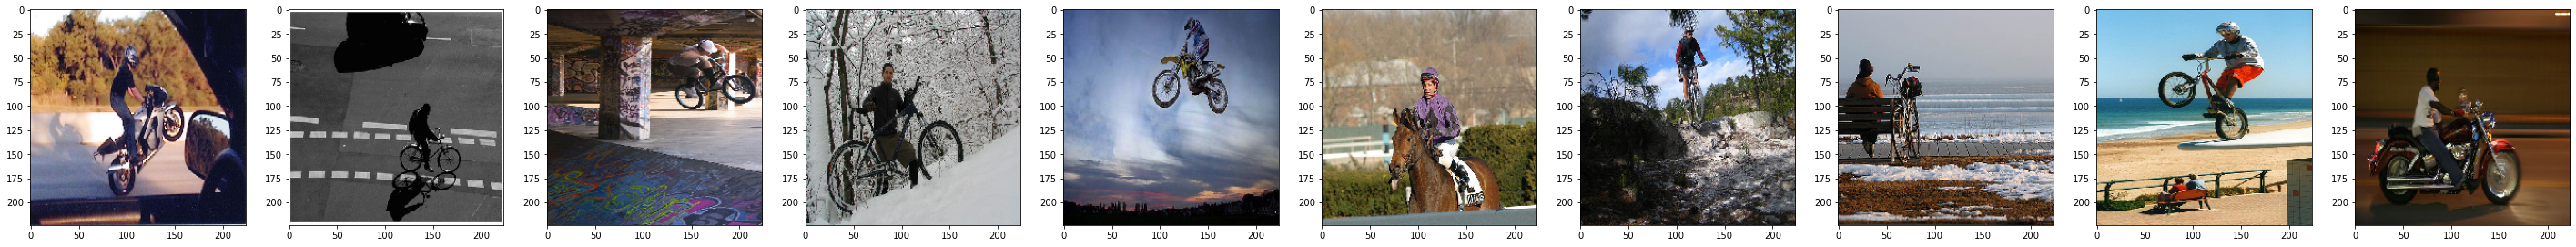

In [ ]:
similar_images = image_search_engine.get_feature_vector(model, query_image_path)
query_results = image_search_engine.search_index_by_value(similar_images, image_index, file_index)
displayImages(query_results)

## Searching Similar words(Similarity)

In [ ]:
word_index, word_mapping = image_search_engine.build_word_index(word_vectors)

INFO:root:Creating mapping and list of features


Building the word index for the engine...


INFO:root:Building tree


Indexing the features of the dataset...


INFO:root:Tree built


In [ ]:
similar_images_vec = word_vectors["iphone"]
vector_results = image_search_engine.search_index_by_value(similar_images_vec, word_index, word_mapping)
display(vector_results)

[[11693, 'iphone', 0.000195216853171587],
 [22595, 'ipad', 0.5334537029266357],
 [14115, 'ipod', 0.6942091584205627],
 [14672, 'app', 0.8250999450683594],
 [3292, 'apple', 0.8958746790885925],
 [16968, 'blackberry', 0.8994969725608826],
 [12180, 'itunes', 0.9465926289558411],
 [12811, 'xbox', 0.9762346148490906],
 [10498, 'playstation', 0.9861131906509399],
 [14178, 'macintosh', 0.9905143976211548]]

## Building a Custom Model for Image-Text and Text-Image Search

In [ ]:
Custom_CNN_model = image_search_engine.setup_custom_model()

Setting up custom imagenet architecture model ...


In [ ]:
custom_model_path_save = "/Users/ganeshkumaranmasilamani/Desktop/model2.hdf5"
custom_model_path_load = "/Users/ganeshkumaranmasilamani/Desktop/model2.hdf5"

Training_model = True
if Training_model:
    num_epochs = 30
    batch_size = 32
    print("Training for %s epochs" % num_epochs)
    x, y = shuffle(images, vectors, random_state=2)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
    checkpoint = ModelCheckpoint(filepath='checkpoint.hdf5', verbose=2, save_best_only=True)
    history = Custom_CNN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size, callbacks=[checkpoint])
    Custom_CNN_model.save(custom_model_path_save)
else:
    st.write("Loading model from `%s`" % custom_model_path_save)
    Custom_CNN_model = load_model(custom_model_path_save)

Training for 30 epochs
Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 327s 408ms/step - loss: 2.2240 - accuracy: 0.0000e+00 - val_loss: 12.2201 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 12.22013, saving model to checkpoint.hdf5
Epoch 2/30
800/800 [==============================] - 299s 374ms/step - loss: 1.6049 - accuracy: 0.0000e+00 - val_loss: 12.3448 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 12.22013
Epoch 3/30
800/800 [==============================] - 302s 378ms/step - loss: 1.3566 - accuracy: 0.0000e+00 - val_loss: 11.2241 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 12.22013 to 11.22408, saving model to checkpoint.hdf5
Epoch 4/30
800/800 [==============================] - 294s 367ms/step - loss: 1.1646 - accuracy: 0.0000e+00 - val_loss: 9.9121 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss improved from 11.22408 to 9.91209, saving model to checkpoi

## Visualizing the Performance of the Model 

In [ ]:
pip install plot_keras_history

Note: you may need to restart the kernel to use updated packages.


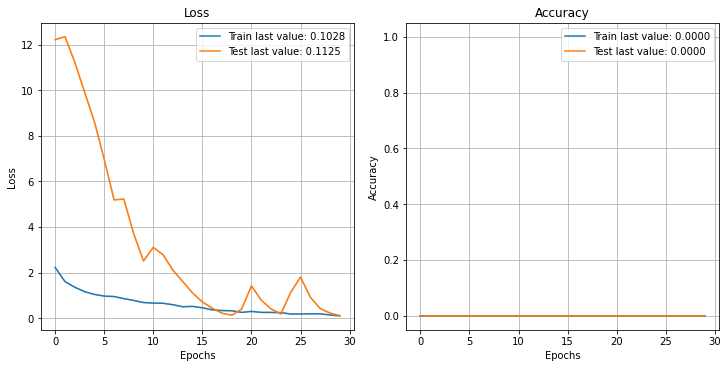

In [ ]:
from plot_keras_history import plot_history
plot_history(history.history, path= 'standard.png')
plt.show()

In [ ]:
score= Custom_CNN_model.evaluate(X_test, y_test, batch_size=100)

200/200 [==============================] - 60s 299ms/step


In [ ]:
print(score) #loss on test set will be 0.11254405230283737

[0.11254405230283737, 0.0]


In [ ]:
generate_custom_features = True
if generate_custom_features:
    hybrid_images_features, file_mapping = image_search_engine.generate_features(image_paths, Custom_CNN_model)
    image_search_engine.save_features(Custom_Images_features_path, hybrid_images_features, Custom_Image_features_mapping_path, file_mapping)
else:
    hybrid_images_features, file_mapping = image_search_engine.load_features(Custom_Images_features_path, Custom_Image_features_mapping_path)

Generating the image features...


INFO:root:1000 images which are loaded
INFO:root:Images preprocessed
INFO:root:Inference done, 297.00931882858276 Generation time
INFO:root:Weights saved


Saving the image features...


In [ ]:
image_index = image_search_engine.index_features(hybrid_images_features, dims=300)

Indexing the features of the dataset...


## Text-Image Search

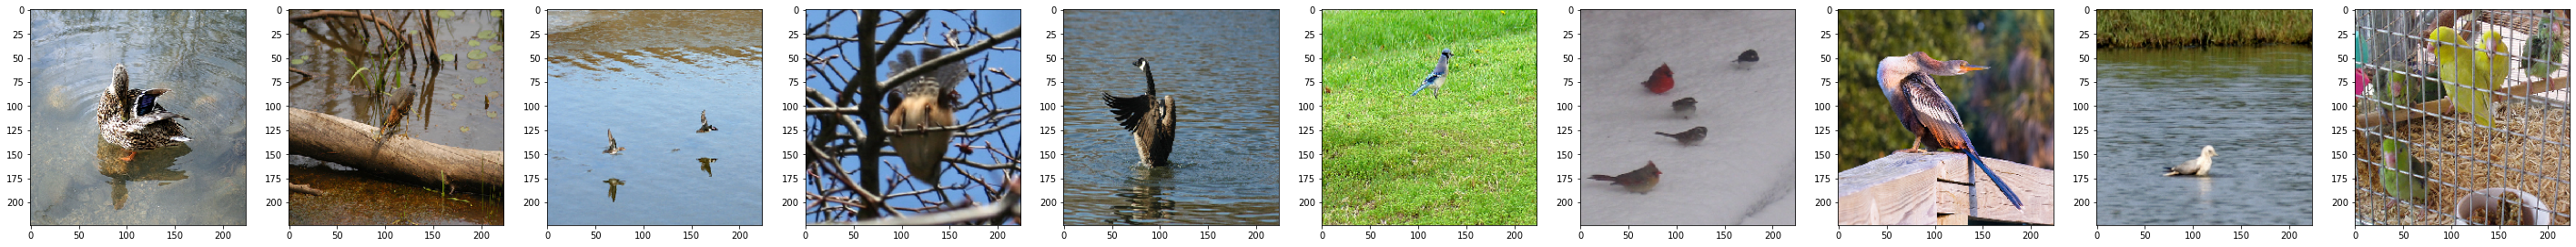

In [ ]:
results = image_search_engine.search_index_by_value(word_vectors["bird"], image_index, file_mapping)
displayImages(results)